In [1]:
!pip install optuna
!pip install dill
!pip install pycaret
!pip install catboost
!pip install py-boost

  Using cached catboost-1.2.8-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
Using cached catboost-1.2.8-cp311-cp311-manylinux2014_x86_64.whl (99.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 119.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 114.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.7/198.7 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: treelite
    Found existing installation: treelite 4.4.1
    Uninstalling treelite-4.4.1:
      Successfully uninstalled treelite-4.4.1
ERROR: pip's dependency resolver does not currentl

In [2]:
import numpy as np
import pandas as pd
import graphviz
import optuna
import warnings
import dill
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import ConvergenceWarning
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [3]:
from catboost import CatBoostClassifier, CatBoostRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor

In [4]:
from sklearn.exceptions import FitFailedWarning
optuna.logging.set_verbosity(optuna.logging.WARNING)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FitFailedWarning)

In [ ]:
from py_boost import SketchBoost

In [5]:
clf_df = pd.read_csv("../data/asteroids_processed.csv")
reg_df = pd.read_csv("../data/cars_processed.csv")

In [3]:
clf_df = pd.read_csv("asteroids_processed.csv")
reg_df = pd.read_csv("cars_processed.csv")

In [6]:
clf_y = clf_df['hazardous']
clf_X = clf_df.drop('hazardous', axis=1)

In [7]:
oversample = SMOTE()
transformed_X, transformed_y = oversample.fit_resample(clf_X, clf_y)

In [8]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(transformed_X, transformed_y, test_size=0.2, random_state=42)

In [6]:
X_train_clf.shape

(119972, 5)

In [10]:
X_train_clf_small, _, y_train_clf_small, _ = train_test_split(transformed_X, transformed_y, test_size=0.95, random_state=42)

In [11]:
X_train_clf_small.shape

(7498, 5)

In [12]:
y_train_clf_small.value_counts()

hazardous
1    3765
0    3733
Name: count, dtype: int64

In [ ]:
def print_metrics_clf(y_test, y_pred):
    print('Accuracy:', round(accuracy_score(y_test, y_pred), 4))
    print('Precision:', round(precision_score(y_test, y_pred), 4))
    print('Recall:', round(recall_score(y_test, y_pred), 4))
    print('F1-score:', round(f1_score(y_test, y_pred), 2))
    print('ROC AUC score:', round(roc_auc_score(y_test, y_pred), 4))
    print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))

In [ ]:
def visualise_clf_tree(model):
    dot_data = export_graphviz(model, out_file=None,
                    feature_names=X_train_clf.columns,
                    class_names=[str(name) for name in y_train_clf.unique()],
                    filled=True, rounded=True,
                    special_characters=True)
    graph = graphviz.Source(dot_data)
    return graph

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

clf_gini.fit(X_train_clf, y_train_clf)
y_pred_gini = clf_gini.predict(X_test_clf)

accuracy_score(y_test_clf, y_pred_gini)

0.9137827565513102

In [ ]:
cross_val_score(DecisionTreeClassifier(criterion='gini', max_depth=3), transformed_X, transformed_y, cv = 5, scoring="accuracy")

array([0.90958192, 0.91167939, 0.91421332, 0.91428   , 0.9124129 ])

In [ ]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(2, 11),
    'min_samples_split': np.arange(2, 6),
    'min_samples_leaf': np.arange(1, 6),
    'ccp_alpha': np.arange(0, 1.1, 0.1)
}

In [ ]:
gs_dt = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=-1).fit(X_train_clf, y_train_clf)

In [ ]:
y_pred = gs_dt.predict(X_test_clf)
print_metrics_clf(y_test_clf, y_pred)
gs_dt.best_params_

Accuracy: 0.9224
Precision: 0.8795
Recall: 0.9785
F1-score: 0.93
ROC AUC score: 0.9224
Confusion matrix: 
 [[13010  2007]
 [  322 14655]]


{'ccp_alpha': 0.0,
 'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

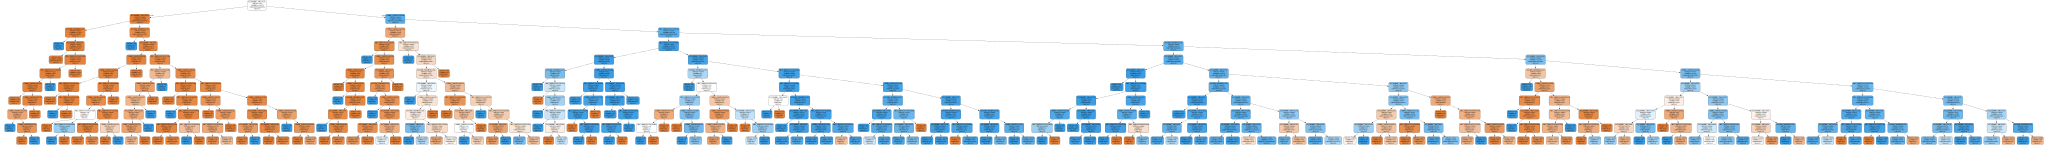

In [ ]:
visualise_clf_tree(gs_dt.best_estimator_)

In [ ]:
rs_dt = RandomizedSearchCV(DecisionTreeClassifier(), parameters).fit(X_train_clf, y_train_clf)

y_pred = rs_dt.predict(X_test_clf)
print_metrics_clf(y_test_clf, y_pred)
rs_dt.best_params_

Accuracy: 0.9063
Precision: 0.8466
Recall: 0.9922
F1-score: 0.91
ROC AUC score: 0.9065
Confusion matrix: 
 [[12325  2692]
 [  117 14860]]


{'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 5,
 'criterion': 'gini',
 'ccp_alpha': 0.2}

In [ ]:
def objective(trial):
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 2, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 5)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    ccp_alpha = trial.suggest_float('ccp_alpha', 0.0, 1.0, step=0.1)

    model = DecisionTreeClassifier(criterion=criterion,
                                   max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf,
                                   ccp_alpha=ccp_alpha)

    model.fit(X_train_clf, y_train_clf)
    y_pred = model.predict(X_test_clf)
    return accuracy_score(y_test_clf, y_pred)

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

opt_dt = DecisionTreeClassifier(criterion=study.best_params['criterion'],
                                max_depth=study.best_params['max_depth'],
                                min_samples_split=study.best_params['min_samples_split'],
                                min_samples_leaf=study.best_params['min_samples_leaf'],
                                ccp_alpha=study.best_params['ccp_alpha'])

opt_dt.fit(X_train_clf, y_train_clf)

y_pred = opt_dt.predict(X_test_clf)
print_metrics_clf(y_test_clf, y_pred)
study.best_params

Accuracy: 0.9233
Precision: 0.88
Recall: 0.98
F1-score: 0.93
ROC AUC score: 0.9233
Confusion matrix: 
 [[13015  2002]
 [  300 14677]]


{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'ccp_alpha': 0.0}

bagging

In [ ]:
parameters = {
    'n_estimators': np.arange(10, 101, 10),
    'max_samples': np.arange(0.1, 1.1, 0.1),
    'max_features': np.arange(1, len(X_train_clf.columns) + 1)
}

In [ ]:
gs_bag = GridSearchCV(BaggingClassifier(), parameters, n_jobs=-1).fit(X_train_clf, y_train_clf)

y_pred = gs_bag.predict(X_test_clf)
print_metrics_clf(y_test_clf, y_pred)
gs_bag.best_params_

Accuracy: 0.9436
Precision: 0.9316
Recall: 0.9572
F1-score: 0.94
ROC AUC score: 0.9436
Confusion matrix: 
 [[13965  1052]
 [  641 14336]]


{'max_features': 5, 'max_samples': 0.9, 'n_estimators': 90}

In [ ]:
rs_bag = RandomizedSearchCV(BaggingClassifier(), parameters, n_jobs=-1).fit(X_train_clf, y_train_clf)

y_pred = rs_bag.predict(X_test_clf)
print_metrics_clf(y_test_clf, y_pred)
rs_bag.best_params_

Accuracy: 0.9366
Precision: 0.9277
Recall: 0.9469
F1-score: 0.94
ROC AUC score: 0.9366
Confusion matrix: 
 [[13912  1105]
 [  796 14181]]


{'n_estimators': 10, 'max_samples': 0.7000000000000001, 'max_features': 4}

In [9]:
import pickle

model = BaggingClassifier(n_estimators=10, max_samples=0.7, max_features=4)
model.fit(X_train_clf, y_train_clf)

with open('../models/bagging_classifier.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 5, 20)
    max_samples = trial.suggest_float('max_samples', 0.1, 1.0, step=0.1)
    max_features = trial.suggest_int('max_features', 1, len(X_train_clf.columns))

    model = BaggingClassifier(
        n_estimators=n_estimators,
        max_samples=max_samples,
        max_features=max_features)

    model.fit(X_train_clf, y_train_clf)
    y_pred = model.predict(X_test_clf)
    return accuracy_score(y_test_clf, y_pred)

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

opt_bag = BaggingClassifier(n_estimators=study.best_params['n_estimators'],
                            max_samples=study.best_params['max_samples'],
                            max_features=study.best_params['max_features'])

opt_bag.fit(X_train_clf, y_train_clf)

y_pred = opt_bag.predict(X_test_clf)
print_metrics_clf(y_test_clf, y_pred)
study.best_params

Accuracy: 0.9402
Precision: 0.9223
Recall: 0.9611
F1-score: 0.94
ROC AUC score: 0.9402
Confusion matrix: 
 [[13805  1212]
 [  583 14394]]


{'n_estimators': 19, 'max_samples': 0.4, 'max_features': 4}

Gradient Boosting

In [16]:
parameters = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [10, 30, 50, 75, 100],
    'max_depth': [3, 5, 7, 9]
}

In [31]:
gs_boost = GridSearchCV(GradientBoostingClassifier(), parameters).fit(X_train_clf_small, y_train_clf_small)

y_pred = gs_boost.predict(X_test_clf)
print_metrics_clf(y_test_clf, y_pred)
gs_boost.best_params_

Accuracy: 0.9237
Precision: 0.8914
Recall: 0.9647
F1-score: 0.93
ROC AUC score: 0.9238
Confusion matrix: 
 [[13257  1760]
 [  528 14449]]


{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}

In [14]:
parameters = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': np.arange(10, 101, 20),
    'subsample': np.arange(0.2, 1.1, 0.2),
    'max_depth': np.arange(3, 9),
    'min_samples_split': np.arange(2, 4),
    'min_samples_leaf': np.arange(1, 3)
}

In [ ]:
rs_boost = RandomizedSearchCV(GradientBoostingClassifier(), parameters, n_jobs=-1).fit(X_train_clf, y_train_clf)

y_pred = rs_boost.predict(X_test_clf)
print_metrics_clf(y_test_clf, y_pred)
rs_boost.best_params_

Accuracy: 0.9346
Precision: 0.9046
Recall: 0.9715
F1-score: 0.94
ROC AUC score: 0.9347
Confusion matrix: 
 [[13483  1534]
 [  427 14550]]


{'subsample': 0.8,
 'n_estimators': 90,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_depth': 7,
 'learning_rate': 0.1}

In [ ]:
def objective(trial):
    learning_rate = trial.suggest_categorical('learning_rate', [0.01, 0.05, 0.1, 0.2, 0.5])
    n_estimators = trial.suggest_int('n_estimators', 10, 100, step=10)
    subsample = trial.suggest_float('subsample', 0.2, 1.0, step=0.2)
    max_depth = trial.suggest_int('max_depth', 3, 9)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 4)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 3)

    model = GradientBoostingClassifier(learning_rate=learning_rate,
                                       n_estimators=n_estimators,
                                       subsample=subsample,
                                       max_depth=max_depth,
                                       min_samples_split=min_samples_split,
                                       min_samples_leaf=min_samples_leaf)

    model.fit(X_train_clf, y_train_clf)
    y_pred = model.predict(X_test_clf)
    return accuracy_score(y_test_clf, y_pred)

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

opt_boost = GradientBoostingClassifier(
    learning_rate=study.best_params['learning_rate'],
    n_estimators=study.best_params['n_estimators'],
    subsample=study.best_params['subsample'],
    max_depth=study.best_params['max_depth'],
    min_samples_split=study.best_params['min_samples_split'],
    min_samples_leaf=study.best_params['min_samples_leaf']
)

opt_boost.fit(X_train_clf, y_train_clf)

y_pred = opt_boost.predict(X_test_clf)
print_metrics_clf(y_test_clf, y_pred)
study.best_params

Accuracy: 0.9429
Precision: 0.9279
Recall: 0.9601
F1-score: 0.94
ROC AUC score: 0.9429
Confusion matrix: 
 [[13900  1117]
 [  597 14380]]


{'learning_rate': 0.2,
 'n_estimators': 90,
 'subsample': 0.8,
 'max_depth': 9,
 'min_samples_split': 3,
 'min_samples_leaf': 3}

In [11]:
model = GradientBoostingClassifier(learning_rate=0.2, n_estimators=90, subsample=0.8, max_depth=9, min_samples_split=3, min_samples_leaf=3)
model.fit(X_train_clf, y_train_clf)

with open('../models/grboosting_classifier.pkl', 'wb') as f:
    pickle.dump(model, f)

Stacking

In [ ]:
estimators = [
    ('knn', KNeighborsClassifier(n_neighbors = 9, metric='euclidean')),
    ('log_reg', LogisticRegression()),
    ('gnb', GaussianNB()),
    ('svc', make_pipeline(StandardScaler(), SVC())),
    ('dt', DecisionTreeClassifier(criterion='gini', max_depth=3))
]

stack_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack_clf.fit(X_train_clf, y_train_clf)

y_pred = stack_clf.predict(X_test_clf)
print_metrics_clf(y_test_clf, y_pred)

Accuracy: 0.9325
Precision: 0.8985
Recall: 0.975
F1-score: 0.94
ROC AUC score: 0.9326
Confusion matrix: 
 [[13367  1650]
 [  374 14603]]


In [10]:
estimators = [
    ('knn', KNeighborsClassifier(n_neighbors = 9, metric='euclidean')),
    ('log_reg', LogisticRegression()),
    ('gnb', GaussianNB()),
    ('svc', make_pipeline(StandardScaler(), SVC())),
    ('dt', DecisionTreeClassifier(criterion='gini', max_depth=3))
]

model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
model.fit(X_train_clf, y_train_clf)

with open('../models/stacking_classifier.pkl', 'wb') as f:
    pickle.dump(model, f)

In [5]:
parameters = {
    'n_estimators': np.arange(60, 141, 40),
    'max_depth': np.arange(4, 9, 2),
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'ccp_alpha': [0.0, 0.2, 0.4]
}

RandomForest

In [8]:
gs_rf = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=-1).fit(X_train_clf_small, y_train_clf_small)

y_pred = gs_rf.predict(X_test_clf)
print_metrics_clf(y_test_clf, y_pred)
gs_rf.best_params_

Accuracy: 0.9144
Precision: 0.8581
Recall: 0.9927
F1-score: 0.92
ROC AUC score: 0.9145
Confusion matrix: 
 [[12558  2459]
 [  109 14868]]


{'ccp_alpha': 0.0,
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 60}

In [ ]:
parameters = {
    'n_estimators': np.arange(40, 141, 20),
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(3, 9),
    'min_samples_split': np.arange(2, 5),
    'min_samples_leaf': np.arange(1, 4),
    'ccp_alpha': np.arange(0, 0.81, 0.2)
}

In [ ]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(), parameters, n_jobs=-1).fit(X_train_clf, y_train_clf)

y_pred = rs_rf.predict(X_test_clf)
print_metrics_clf(y_test_clf, y_pred)
rs_rf.best_params_

Accuracy: 0.9198
Precision: 0.8671
Recall: 0.9913
F1-score: 0.93
ROC AUC score: 0.9199
Confusion matrix: 
 [[12742  2275]
 [  130 14847]]


{'n_estimators': 40,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_depth': 9,
 'criterion': 'gini',
 'ccp_alpha': 0.0}

In [ ]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 40, 140, step=20)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 2, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 4)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 3)
    ccp_alpha = trial.suggest_float('ccp_alpha', 0.0, 1.0, step=0.1)

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        ccp_alpha=ccp_alpha
    )

    model.fit(X_train_clf, y_train_clf)
    y_pred = model.predict(X_test_clf)
    return accuracy_score(y_test_clf, y_pred)

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

opt_rf = RandomForestClassifier(
    n_estimators=study.best_params['n_estimators'],
    criterion=study.best_params['criterion'],
    max_depth=study.best_params['max_depth'],
    min_samples_split=study.best_params['min_samples_split'],
    min_samples_leaf=study.best_params['min_samples_leaf'],
    ccp_alpha=study.best_params['ccp_alpha']
)

opt_rf.fit(X_train_clf, y_train_clf)

y_pred = opt_rf.predict(X_test_clf)
print_metrics_clf(y_test_clf, y_pred)
study.best_params

Accuracy: 0.9221
Precision: 0.8709
Recall: 0.991
F1-score: 0.93
ROC AUC score: 0.9222
Confusion matrix: 
 [[12816  2201]
 [  135 14842]]


{'n_estimators': 80,
 'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'ccp_alpha': 0.0}

CatBoost

In [25]:
parameters = {
    'iterations': [500, 1000, 1500],
    'learning_rate': [0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 5, 11],
    'model_size_reg': [0, 0.5, 1]
}

In [26]:
gs_cat = GridSearchCV(CatBoostClassifier(), parameters, cv=2, n_jobs=-1).fit(X_train_clf_small, y_train_clf_small, verbose=False)

y_pred = gs_cat.predict(X_test_clf)
print_metrics_clf(y_test_clf, y_pred)
gs_cat.best_params_

Accuracy: 0.9256
Precision: 0.9015
Recall: 0.9553
F1-score: 0.93
ROC AUC score: 0.9256
Confusion matrix: 
 [[13454  1563]
 [  670 14307]]


{'depth': 4,
 'iterations': 1500,
 'l2_leaf_reg': 11,
 'learning_rate': 0.1,
 'model_size_reg': 0}

In [32]:
parameters = {
    'iterations': np.arange(500, 2000, 100),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
    'depth': np.arange(4, 10),
    'l2_leaf_reg': np.arange(1, 11),
    'model_size_reg': np.arange(0, 1.1, 0.1)
}

In [ ]:
rs_cat = RandomizedSearchCV(CatBoostClassifier(), parameters, n_jobs=-1).fit(X_train_clf, y_train_clf, verbose=False)

y_pred = rs_cat.predict(X_test_clf)

In [ ]:
y_pred = np.array(y_pred).astype(np.int64)
print_metrics_clf(y_test_clf, y_pred)
rs_cat.best_params_

Accuracy: 0.9425
Precision: 0.9287
Recall: 0.9585
F1-score: 0.94
ROC AUC score: 0.9425
Confusion matrix: 
 [[13915  1102]
 [  622 14355]]


{'model_size_reg': 0.1,
 'learning_rate': 0.2,
 'l2_leaf_reg': 6,
 'iterations': 1600,
 'depth': 7}

In [33]:
def objective(trial):
    iterations = trial.suggest_int('iterations', 500, 2000, step=100)
    learning_rate = trial.suggest_categorical('learning_rate', [0.01, 0.05, 0.1, 0.2, 0.5])
    depth = trial.suggest_int('depth', 4, 9)
    l2_leaf_reg = trial.suggest_int('l2_leaf_reg', 1, 10)
    model_size_reg = trial.suggest_float('model_size_reg', 0.0, 1.0, step=0.1)

    model = CatBoostClassifier(
        iterations=iterations,
        learning_rate=learning_rate,
        depth=depth,
        l2_leaf_reg=l2_leaf_reg,
        model_size_reg=model_size_reg
    )

    model.fit(X_train_clf, y_train_clf, verbose=False)
    y_pred = model.predict(X_test_clf)
    return accuracy_score(y_test_clf, y_pred)

In [34]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

opt_cat = CatBoostClassifier(
    iterations=study.best_params['iterations'],
    learning_rate=study.best_params['learning_rate'],
    depth=study.best_params['depth'],
    l2_leaf_reg=study.best_params['l2_leaf_reg'],
    model_size_reg=study.best_params['model_size_reg']
)

opt_cat.fit(X_train_clf, y_train_clf, verbose=False)

y_pred = opt_cat.predict(X_test_clf)
y_pred = np.array(y_pred).astype(np.int64)
print_metrics_clf(y_test_clf, y_pred)
study.best_params

Accuracy: 0.9429
Precision: 0.9303
Recall: 0.9573
F1-score: 0.94
ROC AUC score: 0.9429
Confusion matrix: 
 [[13943  1074]
 [  640 14337]]


{'iterations': 1600,
 'learning_rate': 0.5,
 'depth': 9,
 'l2_leaf_reg': 9,
 'model_size_reg': 0.30000000000000004}

In [12]:
model = CatBoostClassifier(iterations=1600, learning_rate=0.5, depth=9, l2_leaf_reg = 9, model_size_reg = 0.3)
model.fit(X_train_clf, y_train_clf, verbose=50)
model.save_model("../models/catboost_classifier.cbm")

0:	learn: 0.2717421	total: 266ms	remaining: 7m 5s
50:	learn: 0.1436508	total: 4.59s	remaining: 2m 19s
100:	learn: 0.1290252	total: 8.47s	remaining: 2m 5s
150:	learn: 0.1193065	total: 12s	remaining: 1m 55s
200:	learn: 0.1121626	total: 15.6s	remaining: 1m 48s
250:	learn: 0.1055398	total: 20.1s	remaining: 1m 47s
300:	learn: 0.0993818	total: 24.1s	remaining: 1m 44s
350:	learn: 0.0942828	total: 27.4s	remaining: 1m 37s
400:	learn: 0.0898006	total: 30.8s	remaining: 1m 32s
450:	learn: 0.0857099	total: 34.3s	remaining: 1m 27s
500:	learn: 0.0824563	total: 37.8s	remaining: 1m 23s
550:	learn: 0.0791175	total: 41.3s	remaining: 1m 18s
600:	learn: 0.0757200	total: 44.7s	remaining: 1m 14s
650:	learn: 0.0725463	total: 48.2s	remaining: 1m 10s
700:	learn: 0.0694307	total: 51.9s	remaining: 1m 6s
750:	learn: 0.0675352	total: 55.4s	remaining: 1m 2s
800:	learn: 0.0649894	total: 59.4s	remaining: 59.3s
850:	learn: 0.0625367	total: 1m 2s	remaining: 55.4s
900:	learn: 0.0604786	total: 1m 7s	remaining: 52.3s
950:	

XGBoost

In [22]:
parameters = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5, 7],
    'reg_lambda': [1, 5],
    'gamma': [0, 0.1, 0.2]
}

In [23]:
gs_xgb = GridSearchCV(XGBClassifier(), parameters, cv=2, n_jobs=-1).fit(X_train_clf_small, y_train_clf_small)

y_pred = gs_xgb.predict(X_test_clf)
y_pred = np.array(y_pred).astype(np.int64)
print_metrics_clf(y_test_clf, y_pred)
gs_xgb.best_params_

Accuracy: 0.9197
Precision: 0.8745
Recall: 0.9798
F1-score: 0.92
ROC AUC score: 0.9198
Confusion matrix: 
 [[12912  2105]
 [  303 14674]]


{'gamma': 0.1,
 'learning_rate': 0.2,
 'max_depth': 3,
 'n_estimators': 100,
 'reg_lambda': 1}

In [35]:
parameters = {
    'n_estimators': np.arange(100, 501, step=100),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': np.arange(3, 8),
    'reg_lambda': [1, 2, 3, 5, 7, 9],
    'gamma': [0, 0.1, 0.5, 1]
}

In [ ]:
rs_xgb = RandomizedSearchCV(XGBClassifier(), parameters, n_jobs=-1).fit(X_train_clf, y_train_clf)

y_pred = rs_xgb.predict(X_test_clf)
y_pred = np.array(y_pred).astype(np.int64)
print_metrics_clf(y_test_clf, y_pred)
rs_xgb.best_params_

c:\Users\admin\OneDrive\Рабочий стол\ML&BD\venv\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [       nan 0.9308672         nan 0.91607208 0.91604708 0.93117561
 0.91765579 0.91942287 0.93012536 0.92915847]
  warnings.warn(


Accuracy: 0.9338
Precision: 0.9046
Recall: 0.9697
F1-score: 0.94
ROC AUC score: 0.9339
Confusion matrix: 
 [[13486  1531]
 [  454 14523]]


{'reg_lambda': 1,
 'n_estimators': 200,
 'max_depth': 7,
 'learning_rate': 0.1,
 'gamma': 0.5}

In [36]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 100, 500, step=100)
    learning_rate = trial.suggest_categorical("learning_rate", [0.01, 0.05, 0.1, 0.2])
    max_depth = trial.suggest_int("max_depth", 3, 7)
    reg_lambda = trial.suggest_categorical("reg_lambda", [1, 2, 3, 5, 7, 9])
    gamma = trial.suggest_categorical("gamma", [0, 0.1, 0.5, 1])

    model = XGBClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        reg_lambda=reg_lambda,
        gamma=gamma
    )

    model.fit(X_train_clf, y_train_clf)
    y_pred = model.predict(X_test_clf)
    return accuracy_score(y_test_clf, y_pred)

In [37]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

opt_xgb = XGBClassifier(
    n_estimators=study.best_params['n_estimators'],
    learning_rate=study.best_params['learning_rate'],
    max_depth=study.best_params['max_depth'],
    reg_lambda=study.best_params['reg_lambda'],
    gamma=study.best_params['gamma']
)

opt_xgb.fit(X_train_clf, y_train_clf)

y_pred = opt_xgb.predict(X_test_clf)
y_pred = np.array(y_pred).astype(np.int64)
print_metrics_clf(y_test_clf, y_pred)
study.best_params

Accuracy: 0.9378
Precision: 0.9164
Recall: 0.9633
F1-score: 0.94
ROC AUC score: 0.9378
Confusion matrix: 
 [[13701  1316]
 [  550 14427]]


{'n_estimators': 300,
 'learning_rate': 0.2,
 'max_depth': 7,
 'reg_lambda': 3,
 'gamma': 0}

LightGBM

In [19]:
parameters = {
    'n_estimators': [50, 200, 500],
    'learning_rate': [0.1, 0.2],
    'max_depth': [4, 6, 8],
    'num_leaves': [20, 50, 80],
    'min_split_gain': [0.1, 0.5, 1]
}

In [21]:
gs_lgbm = GridSearchCV(LGBMClassifier(verbose=-1), parameters, cv=2, n_jobs=-1).fit(X_train_clf_small, y_train_clf_small)

y_pred = gs_lgbm.predict(X_test_clf)
print_metrics_clf(y_test_clf, y_pred)
gs_lgbm.best_params_

Accuracy: 0.9272
Precision: 0.895
Recall: 0.9677
F1-score: 0.93
ROC AUC score: 0.9272
Confusion matrix: 
 [[13317  1700]
 [  484 14493]]


{'learning_rate': 0.1,
 'max_depth': 8,
 'min_split_gain': 0.1,
 'n_estimators': 200,
 'num_leaves': 20}

In [38]:
parameters = {
    'n_estimators': np.arange(50, 501, 50),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
    'max_depth': np.arange(4, 10),
    'num_leaves': np.arange(10, 101, 10),
    'min_split_gain': [0.1, 0.5, 1, 2.5, 5]
}

In [ ]:
rs_lgbm = RandomizedSearchCV(LGBMClassifier(verbose=-1), parameters, n_jobs=-1).fit(X_train_clf, y_train_clf)

y_pred = rs_lgbm.predict(X_test_clf)
print_metrics_clf(y_test_clf, y_pred)
rs_lgbm.best_params_

Accuracy: 0.9375
Precision: 0.9135
Recall: 0.9663
F1-score: 0.94
ROC AUC score: 0.9375
Confusion matrix: 
 [[13646  1371]
 [  505 14472]]


{'num_leaves': 90,
 'n_estimators': 450,
 'min_split_gain': 1,
 'max_depth': 9,
 'learning_rate': 0.2}

In [42]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 500, step=50)
    learning_rate = trial.suggest_categorical('learning_rate', [0.01, 0.05, 0.1, 0.2, 0.5])
    max_depth = trial.suggest_int('max_depth', 4, 9)
    num_leaves = trial.suggest_int('num_leaves', 10, 100, step=10)
    min_split_gain = trial.suggest_categorical('min_split_gain', [0.1, 0.5, 1, 2.5, 5])

    model = LGBMClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        num_leaves=num_leaves,
        min_split_gain=min_split_gain,
        verbose=-1
    )

    model.fit(X_train_clf, y_train_clf)
    y_pred = model.predict(X_test_clf)
    return accuracy_score(y_test_clf, y_pred)

In [43]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

opt_lgbm = LGBMClassifier(
    n_estimators=study.best_params['n_estimators'],
    learning_rate=study.best_params['learning_rate'],
    max_depth=study.best_params['max_depth'],
    num_leaves=study.best_params['num_leaves'],
    min_split_gain=study.best_params['min_split_gain'],
    verbose=-1
)

opt_lgbm.fit(X_train_clf, y_train_clf)

y_pred = opt_lgbm.predict(X_test_clf)
print_metrics_clf(y_test_clf, y_pred)
study.best_params

  File "c:\Users\admin\OneDrive\Рабочий стол\ML&BD\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Accuracy: 0.9423
Precision: 0.9276
Recall: 0.9593
F1-score: 0.94
ROC AUC score: 0.9423
Confusion matrix: 
 [[13895  1122]
 [  609 14368]]


{'n_estimators': 450,
 'learning_rate': 0.2,
 'max_depth': 7,
 'num_leaves': 100,
 'min_split_gain': 0.1}

SketchBoost

In [8]:
sketch_clf = SketchBoost(
    'crossentropy',
     ntrees=10000, lr=0.03, verbose=1000, es=300, lambda_l2=1, gd_steps=1,
     subsample=1, colsample=1, min_data_in_leaf=10,
     max_bin=256, max_depth=6
)

sketch_clf.fit(X_train_clf, y_train_clf, eval_sets = [{'X': X_test_clf, 'y': y_test_clf}])
y_pred = np.argmax(sketch_clf.predict(X_test_clf), axis=1)
print_metrics_clf(y_test_clf, y_pred)

[07:58:50] Stdout logging level is INFO.


INFO:py_boost.callbacks.callback:Stdout logging level is INFO.


[07:58:50] GDBT train starts. Max iter 10000, early stopping rounds 300


INFO:py_boost.callbacks.callback:GDBT train starts. Max iter 10000, early stopping rounds 300


[07:59:07] Iter 0; Sample 0, Crossentropy = 0.6715246370653966; 


INFO:py_boost.callbacks.callback:Iter 0; Sample 0, Crossentropy = 0.6715246370653966; 


[07:59:32] Iter 1000; Sample 0, Crossentropy = 0.14848629781247732; 


INFO:py_boost.callbacks.callback:Iter 1000; Sample 0, Crossentropy = 0.14848629781247732; 


[07:59:53] Iter 2000; Sample 0, Crossentropy = 0.14269689907728567; 


INFO:py_boost.callbacks.callback:Iter 2000; Sample 0, Crossentropy = 0.14269689907728567; 


[08:00:18] Iter 3000; Sample 0, Crossentropy = 0.14072942974384775; 


INFO:py_boost.callbacks.callback:Iter 3000; Sample 0, Crossentropy = 0.14072942974384775; 


[08:00:36] Iter 4000; Sample 0, Crossentropy = 0.13969743264200996; 


INFO:py_boost.callbacks.callback:Iter 4000; Sample 0, Crossentropy = 0.13969743264200996; 


[08:00:49] Early stopping at iter 4814, best iter 4514, best_score 0.13943012903812246


INFO:py_boost.callbacks.callback:Early stopping at iter 4814, best iter 4514, best_score 0.13943012903812246


Accuracy: 0.9387
Precision: 0.9222
Recall: 0.9581
F1-score: 0.94
ROC AUC score: 0.9387
Confusion matrix: 
 [[13807  1210]
 [  628 14349]]


In [14]:
sketch_clf = SketchBoost(
    'crossentropy',
     ntrees=10000, lr=0.03, verbose=1000, es=300, lambda_l2=1, gd_steps=1,
     subsample=1, colsample=1, min_data_in_leaf=10,
     max_bin=256, max_depth=6
)

sketch_clf.fit(X_train_clf, y_train_clf, eval_sets = [{'X': X_test_clf, 'y': y_test_clf}])
y_pred = np.argmax(sketch_clf.predict(X_train_clf), axis=1)
print_metrics_clf(y_train_clf, y_pred)

[08:17:52] Stdout logging level is INFO.


INFO:py_boost.callbacks.callback:Stdout logging level is INFO.


[08:17:52] GDBT train starts. Max iter 10000, early stopping rounds 300


INFO:py_boost.callbacks.callback:GDBT train starts. Max iter 10000, early stopping rounds 300


[08:17:52] Iter 0; Sample 0, Crossentropy = 0.6715246370653966; 


INFO:py_boost.callbacks.callback:Iter 0; Sample 0, Crossentropy = 0.6715246370653966; 


[08:18:08] Iter 1000; Sample 0, Crossentropy = 0.14849529287213326; 


INFO:py_boost.callbacks.callback:Iter 1000; Sample 0, Crossentropy = 0.14849529287213326; 


[08:18:24] Iter 2000; Sample 0, Crossentropy = 0.14270080987889205; 


INFO:py_boost.callbacks.callback:Iter 2000; Sample 0, Crossentropy = 0.14270080987889205; 


[08:18:39] Iter 3000; Sample 0, Crossentropy = 0.14073217668891; 


INFO:py_boost.callbacks.callback:Iter 3000; Sample 0, Crossentropy = 0.14073217668891; 


[08:18:54] Iter 4000; Sample 0, Crossentropy = 0.13978963644298484; 


INFO:py_boost.callbacks.callback:Iter 4000; Sample 0, Crossentropy = 0.13978963644298484; 


[08:19:03] Early stopping at iter 4561, best iter 4261, best_score 0.13965557269920503


INFO:py_boost.callbacks.callback:Early stopping at iter 4561, best iter 4261, best_score 0.13965557269920503


Accuracy: 0.9677
Precision: 0.9557
Recall: 0.9809
F1-score: 0.97
ROC AUC score: 0.9677
Confusion matrix: 
 [[57238  2728]
 [ 1145 58861]]


In [ ]:
from pycaret.classification import *

setup(data=clf_df, target='hazardous', train_size=0.8, preprocess=True, session_id=42)

,Description,Value
0,Session id,42
1,Target,hazardous
2,Target type,Binary
3,Original data shape,"(81330, 6)"
4,Transformed data shape,"(81330, 6)"
5,Transformed train set shape,"(65064, 6)"
6,Transformed test set shape,"(16266, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models(include=['dt', 'gbc', 'rf', 'catboost', 'xgboost', 'lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9361,0.9493,0.3275,0.6919,0.4443,0.4149,0.4480,24.0760
lightgbm,Light Gradient Boosting Machine,0.9338,0.9467,0.2515,0.7175,0.3720,0.3455,0.3994,1.3290
rf,Random Forest Classifier,0.9319,0.9439,0.3946,0.5964,0.4748,0.4399,0.4508,6.5450
gbc,Gradient Boosting Classifier,0.9309,0.9433,0.1741,0.7447,0.2818,0.2600,0.3384,9.3020
xgboost,Extreme Gradient Boosting,0.9302,0.9413,0.2708,0.6211,0.3770,0.3460,0.3798,0.4260
dt,Decision Tree Classifier,0.9137,0.7069,0.4620,0.4488,0.4551,0.4082,0.4084,1.4130


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

In [ ]:
estimators = [rs_dt, rs_bag, rs_boost, stack_clf, rs_rf, rs_cat, rs_xgb, rs_lgbm]
names = ['DecisionTreeClassifier', 'BaggingClassifier', 'GradientBoostingClassifier', 'StackingClassifier', 'RandomForestClassifier', 'CatBoostClassifier', 'XGBClassifier', 'LGBMClassifier']

table = pd.DataFrame()
for estimator, name in zip(estimators, names):
    y_pred = estimator.predict(X_train_clf)
    table.loc[name, 'train_accuracy'] = round(accuracy_score(y_train_clf, y_pred), 4)
    table.loc[name, 'train_precision'] = round(precision_score(y_train_clf, y_pred), 4)
    table.loc[name, 'train_recall'] = round(recall_score(y_train_clf, y_pred), 4)
    table.loc[name, 'train_F1'] = round(f1_score(y_train_clf, y_pred), 2)
    y_pred = estimator.predict(X_test_clf)
    table.loc[name, 'test_accuracy'] = round(accuracy_score(y_test_clf, y_pred), 4)
    table.loc[name, 'test_precision'] = round(precision_score(y_test_clf, y_pred), 4)
    table.loc[name, 'test_recall'] = round(recall_score(y_test_clf, y_pred), 4)
    table.loc[name, 'test_F1'] = round(f1_score(y_test_clf, y_pred), 2)
table

,train_accuracy,train_precision,train_recall,train_F1,test_accuracy,test_precision,test_recall,test_F1
DecisionTreeClassifier,0.9085,0.8496,0.9927,0.92,0.9061,0.8466,0.9917,0.91
BaggingClassifier,0.9912,0.9955,0.9868,0.99,0.9442,0.9255,0.9659,0.95
GradientBoostingClassifier,0.9427,0.9132,0.9784,0.94,0.9346,0.9046,0.9715,0.94
StackingClassifier,0.9438,0.9092,0.9861,0.95,0.9325,0.8985,0.9750,0.94
RandomForestClassifier,0.9217,0.8690,0.9932,0.93,0.9198,0.8671,0.9913,0.93
CatBoostClassifier,0.9684,0.9580,0.9799,0.97,0.9425,0.9287,0.9585,0.94
XGBClassifier,0.9405,0.9122,0.9749,0.94,0.9338,0.9046,0.9697,0.94
LGBMClassifier,0.9451,0.9217,0.9730,0.95,0.9375,0.9135,0.9663,0.94


Лучшая модель для задачи классификации - BaggingClassifier и catboost, дающие наибольшую точность (accuracy - 0.9442 и 0.9425). У всех моделей точность на тестовых данных превышает 0.9, что говорит о хорошем качестве классификации всеми моделями. Явное переобучение заметно только на BaggingClassifier, где точность на тестовых данных практически равна единице (accuracy - 0.9912), на остальных моделях переобучение менее заметно.

In [ ]:
estimators = [rs_dt, rs_bag, rs_boost, stack_clf, rs_rf, rs_cat, rs_xgb, rs_lgbm]
names = ['DecisionTreeClassifier', 'BaggingClassifier', 'GradientBoostingClassifier', 'StackingClassifier', 'RandomForestClassifier', 'CatBoostClassifier', 'XGBClassifier', 'LGBMClassifier']

table = pd.DataFrame()
for estimator, name in zip(estimators, names):
    y_pred = estimator.predict(X_test_clf)
    table.loc[name, 'holdout_accuracy'] = round(accuracy_score(y_test_clf, y_pred), 4)
    table.loc[name, 'holdout_precision'] = round(precision_score(y_test_clf, y_pred), 4)
    table.loc[name, 'holdout_recall'] = round(recall_score(y_test_clf, y_pred), 4)
    table.loc[name, 'holdout_F1'] = round(f1_score(y_test_clf, y_pred), 2)
    y_pred = cross_validate(estimator, transformed_X, transformed_y, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
    table.loc[name, 'kfold_accuracy'] = round(np.mean(y_pred['test_accuracy']), 4)
    table.loc[name, 'kfold_precision'] = round(np.mean(y_pred['test_precision']), 4)
    table.loc[name, 'kfold_recall'] = round(np.mean(y_pred['test_recall']), 4)
    table.loc[name, 'kfold_F1'] = round(np.mean(y_pred['test_f1']), 2)
table

0:	learn: 0.2825565	total: 56ms	remaining: 50.3s
1:	learn: 0.2073274	total: 108ms	remaining: 48.6s
2:	learn: 0.1905771	total: 160ms	remaining: 47.9s
3:	learn: 0.1859772	total: 211ms	remaining: 47.2s
4:	learn: 0.1819506	total: 283ms	remaining: 50.6s
5:	learn: 0.1790493	total: 336ms	remaining: 50.1s
6:	learn: 0.1753035	total: 404ms	remaining: 51.5s
7:	learn: 0.1708187	total: 469ms	remaining: 52.3s
8:	learn: 0.1676448	total: 543ms	remaining: 53.7s
9:	learn: 0.1655303	total: 613ms	remaining: 54.6s
10:	learn: 0.1640808	total: 689ms	remaining: 55.7s
11:	learn: 0.1589738	total: 748ms	remaining: 55.4s
12:	learn: 0.1577489	total: 804ms	remaining: 54.9s
13:	learn: 0.1565777	total: 861ms	remaining: 54.5s
14:	learn: 0.1560340	total: 920ms	remaining: 54.3s
15:	learn: 0.1541513	total: 983ms	remaining: 54.3s
16:	learn: 0.1535173	total: 1.04s	remaining: 54.2s
17:	learn: 0.1515607	total: 1.11s	remaining: 54.5s
18:	learn: 0.1512183	total: 1.17s	remaining: 54.2s
19:	learn: 0.1504012	total: 1.23s	remainin

,holdout_accuracy,holdout_precision,holdout_recall,holdout_F1,kfold_accuracy,kfold_precision,kfold_recall,kfold_F1
DecisionTreeClassifier,0.9061,0.8466,0.9917,0.91,0.9145,0.6854,0.9759,0.77
BaggingClassifier,0.9442,0.9255,0.9659,0.95,0.9339,0.7407,0.8945,0.79
GradientBoostingClassifier,0.9346,0.9046,0.9715,0.94,0.9267,0.7215,0.9096,0.78
StackingClassifier,0.9325,0.8985,0.9750,0.94,0.9223,0.7265,0.9604,0.80
RandomForestClassifier,0.9198,0.8671,0.9913,0.93,0.9060,0.6745,0.9929,0.76
CatBoostClassifier,0.9425,0.9287,0.9585,0.94,0.9338,0.7435,0.8740,0.79
XGBClassifier,0.9338,0.9046,0.9697,0.94,0.9202,0.7134,0.9130,0.78
LGBMClassifier,0.9375,0.9135,0.9663,0.94,0.9297,0.7290,0.8899,0.79


<font size = 8>
    <b>Регрессия</b>
</font>

In [46]:
reg_y = reg_df['price_usd']
reg_X = reg_df.drop('price_usd', axis=1)

In [47]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(reg_X, reg_y, test_size=0.2, random_state=42)

In [51]:
X_train_reg_small, _, y_train_reg_small, _ = train_test_split(reg_X, reg_y, test_size=0.75, random_state=42)

In [52]:
X_train_reg_small.shape

(7348, 26)

In [28]:
def print_metrics_reg(y_pred, model):
    y_true = np.array(y_test_reg, dtype=np.float64, copy=True)
    print(f'MAE: {round(mean_absolute_error(y_true, y_pred), 4)}')
    print(f'MSE: {round(mean_squared_error(y_true, y_pred), 4)}')
    print(f'RMSE: {round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)}')
    print(f'MAPE: {round(mean_absolute_percentage_error(y_true, y_pred), 4)}')
    print(f'R^2: {round(model.score(X_test_reg, y_true), 2)}')

In [ ]:
parameters = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': np.arange(3, 9),
    'min_samples_split': np.arange(2, 6),
    'min_samples_leaf': np.arange(1, 6),
    'ccp_alpha': np.arange(0, 1.1, 0.2)
}

In [ ]:
gs_reg = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=-1).fit(X_train_reg, y_train_reg)

y_pred = gs_reg.predict(X_test_reg)
print_metrics_reg(y_pred, gs_reg)
gs_reg.best_params_

MAE: 1089.1801
MSE: 2434175.2385
RMSE: 1560.1844
MAPE: 0.3592
R^2: 0.86


{'ccp_alpha': 0.0,
 'criterion': 'poisson',
 'max_depth': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [ ]:
rs_reg = RandomizedSearchCV(DecisionTreeRegressor(), parameters, n_jobs=-1).fit(X_train_reg, y_train_reg)

y_pred = rs_reg.predict(X_test_reg)
print_metrics_reg(y_pred, rs_reg)
rs_reg.best_params_

MAE: 1156.67
MSE: 2677874.9424
RMSE: 1636.4214
MAPE: 0.3998
R^2: 0.85


{'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_depth': 7,
 'criterion': 'friedman_mse',
 'ccp_alpha': 0.0}

In [ ]:
def objective(trial):
    criterion = trial.suggest_categorical('criterion', ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'])
    max_depth = trial.suggest_int('max_depth', 3, 8)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 5)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    ccp_alpha = trial.suggest_float('ccp_alpha', 0.0, 1.0, step=0.2)

    model = DecisionTreeRegressor(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        ccp_alpha=ccp_alpha
    )

    model.fit(X_train_reg, y_train_reg)
    y_pred = model.predict(X_test_reg)

    return mean_squared_error(y_test_reg, y_pred)

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

opt_dtr = DecisionTreeRegressor(
    criterion=study.best_params['criterion'],
    max_depth=study.best_params['max_depth'],
    min_samples_split=study.best_params['min_samples_split'],
    min_samples_leaf=study.best_params['min_samples_leaf'],
    ccp_alpha=study.best_params['ccp_alpha']
)

opt_dtr.fit(X_train_reg, y_train_reg)

y_pred = opt_dtr.predict(X_test_reg)
print_metrics_reg(y_pred, opt_dtr)
study.best_params

MAE: 1106.0569
MSE: 2474136.9795
RMSE: 1572.939
MAPE: 0.3772
R^2: 0.86


{'criterion': 'squared_error',
 'max_depth': 8,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'ccp_alpha': 0.8}

In [ ]:
parameters = {
    'n_estimators': np.arange(10, 101, 20),
    'max_samples': np.arange(0.1, 1.1, 0.2),
    'max_features': np.arange(1, len(X_train_clf.columns) + 1)
}

In [ ]:
gs_bagging = GridSearchCV(BaggingRegressor(), parameters, n_jobs=-1).fit(X_train_reg, y_train_reg)

y_pred = gs_bagging.predict(X_test_reg)
print_metrics_reg(y_pred, gs_bagging)
gs_bagging.best_params_

MAE: 1803.1359
MSE: 5722701.6619
RMSE: 2392.2169
MAPE: 0.8638
R^2: 0.68


{'max_features': 5, 'max_samples': 0.7000000000000001, 'n_estimators': 30}

In [ ]:
rs_bagging = RandomizedSearchCV(BaggingRegressor(), parameters, n_jobs=-1).fit(X_train_reg, y_train_reg)

y_pred = rs_bagging.predict(X_test_reg)
print_metrics_reg(y_pred, rs_bagging)
rs_bagging.best_params_

MAE: 1902.9099
MSE: 6198635.279
RMSE: 2489.7059
MAPE: 0.9228
R^2: 0.65


{'n_estimators': 70, 'max_samples': 0.30000000000000004, 'max_features': 5}

In [ ]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 100, step=20)
    max_samples = trial.suggest_float('max_samples', 0.1, 1.0, step=0.2)
    max_features = trial.suggest_int('max_features', 1, len(X_train_reg.columns))

    model = BaggingRegressor(
        n_estimators=n_estimators,
        max_samples=max_samples,
        max_features=max_features
    )

    model.fit(X_train_reg, y_train_reg)
    y_pred = model.predict(X_test_reg)
    return mean_squared_error(y_test_reg, y_pred)

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

opt_bagging = BaggingRegressor(
    n_estimators=study.best_params['n_estimators'],
    max_samples=study.best_params['max_samples'],
    max_features=study.best_params['max_features']
)

opt_bagging.fit(X_train_reg, y_train_reg)

y_pred = opt_bagging.predict(X_test_reg)
print_metrics_reg(y_pred, opt_bagging)
study.best_params

MAE: 857.1389
MSE: 1554605.9235
RMSE: 1246.8384
MAPE: 0.3106
R^2: 0.91


{'n_estimators': 70, 'max_samples': 0.9, 'max_features': 22}

In [ ]:
parameters = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': np.arange(10, 101, 20),
    'subsample': np.arange(0.2, 1.1, 0.2),
    'max_depth': np.arange(3, 9),
    'min_samples_split': np.arange(2, 4),
    'min_samples_leaf': np.arange(1, 3)
}

In [ ]:
gs_gb = GridSearchCV(GradientBoostingRegressor(), parameters, n_jobs=-1).fit(X_train_reg, y_train_reg)

y_pred = gs_gb.predict(X_test_reg)
print_metrics_reg(y_pred, gs_gb)
gs_gb.best_params_

MAE: 778.4673
MSE: 1265106.3199
RMSE: 1124.7695
MAPE: 0.255
R^2: 0.93


{'learning_rate': 0.2,
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 90,
 'subsample': 1.0}

In [ ]:
rs_gb = RandomizedSearchCV(GradientBoostingRegressor(), parameters, n_jobs=-1).fit(X_train_reg, y_train_reg)

y_pred = rs_gb.predict(X_test_reg)
print_metrics_reg(y_pred, rs_gb)
rs_gb.best_params_

MAE: 816.3886
MSE: 1379198.2586
RMSE: 1174.3927
MAPE: 0.2711
R^2: 0.92


{'subsample': 1.0,
 'n_estimators': 30,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_depth': 8,
 'learning_rate': 0.2}

In [ ]:
def objective(trial):
    learning_rate = trial.suggest_categorical('learning_rate', [0.01, 0.05, 0.1, 0.2])
    n_estimators = trial.suggest_int('n_estimators', 10, 100, step=20)
    subsample = trial.suggest_float('subsample', 0.2, 1.0, step=0.2)
    max_depth = trial.suggest_int('max_depth', 3, 8)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 3)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 2)

    model = GradientBoostingRegressor(
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        subsample=subsample,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )

    model.fit(X_train_reg, y_train_reg)
    y_pred = model.predict(X_test_reg)
    return mean_squared_error(y_test_reg, y_pred)

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

opt_gb = GradientBoostingRegressor(
    learning_rate=study.best_params['learning_rate'],
    n_estimators=study.best_params['n_estimators'],
    subsample=study.best_params['subsample'],
    max_depth=study.best_params['max_depth'],
    min_samples_split=study.best_params['min_samples_split'],
    min_samples_leaf=study.best_params['min_samples_leaf']
)

opt_gb.fit(X_train_reg, y_train_reg)

y_pred = opt_gb.predict(X_test_reg)
print_metrics_reg(y_pred, opt_gb)
study.best_params

MAE: 791.9891
MSE: 1313825.6271
RMSE: 1146.2223
MAPE: 0.2617
R^2: 0.93


{'learning_rate': 0.2,
 'n_estimators': 90,
 'subsample': 0.8,
 'max_depth': 7,
 'min_samples_split': 2,
 'min_samples_leaf': 2}

In [29]:
estimators = [
    ('linear', LinearRegression()),
    ('poly', make_pipeline(PolynomialFeatures(degree=2), LinearRegression())),
    ('dt', DecisionTreeRegressor(max_depth=4))
]
stack_reg = StackingRegressor(estimators=estimators)
stack_reg.fit(X_train_reg, np.copy(y_train_reg))

y_pred = stack_reg.predict(X_test_reg)
print_metrics_reg(y_pred, stack_reg)

MAE: 1271.6753
MSE: 3160775.4328
RMSE: 1777.857
MAPE: 0.4279
R^2: 0.82


In [9]:
parameters = {
    'n_estimators': np.arange(60, 141, 40),
    'max_depth': np.arange(4, 9, 2),
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'ccp_alpha': [0.0, 0.2, 0.4]
}

In [11]:
X_train_reg_small = X_train_reg_small.copy()
y_train_reg_small = y_train_reg_small.copy()

In [12]:
gs_rf = GridSearchCV(RandomForestRegressor(), parameters, n_jobs=-1).fit(X_train_reg_small, y_train_reg_small)

y_pred = gs_rf.predict(X_test_reg)
print_metrics_reg(y_pred, gs_rf)
gs_rf.best_params_

MAE: 1036.6882
MSE: 2195400.4511
RMSE: 1481.6884
MAPE: 0.3641
R^2: 0.88


{'ccp_alpha': 0.4,
 'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 60}

In [44]:
parameters = {
    'n_estimators': np.arange(40, 141, 20),
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': np.arange(3, 9),
    'min_samples_split': np.arange(2, 5),
    'min_samples_leaf': np.arange(1, 4),
    'ccp_alpha': np.arange(0, 0.81, 0.2)
}

In [45]:
rs_rf = RandomizedSearchCV(RandomForestRegressor(), parameters, n_jobs=-1).fit(X_train_reg, y_train_reg)

y_pred = rs_rf.predict(X_test_reg)
print_metrics_reg(y_pred, rs_rf)
rs_rf.best_params_

MAE: 1007.5606
MSE: 2077824.0975
RMSE: 1441.466
MAPE: 0.3546
R^2: 0.88


{'n_estimators': 120,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': 8,
 'criterion': 'friedman_mse',
 'ccp_alpha': 0.6000000000000001}

In [ ]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 40, 140, step=20)
    criterion = trial.suggest_categorical('criterion', ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'])
    max_depth = trial.suggest_int('max_depth', 3, 8)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 4)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 3)
    ccp_alpha = trial.suggest_float('ccp_alpha', 0.0, 0.8, step=0.2)

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        ccp_alpha=ccp_alpha,
        n_jobs=-1
    )

    model.fit(X_train_reg, y_train_reg)
    y_pred = model.predict(X_test_reg)
    return mean_squared_error(y_test_reg, y_pred)

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

opt_rf = RandomForestRegressor(
    n_estimators=study.best_params['n_estimators'],
    criterion=study.best_params['criterion'],
    max_depth=study.best_params['max_depth'],
    min_samples_split=study.best_params['min_samples_split'],
    min_samples_leaf=study.best_params['min_samples_leaf'],
    ccp_alpha=study.best_params['ccp_alpha'],
    n_jobs=-1
)

opt_rf.fit(X_train_reg, y_train_reg)

y_pred = opt_rf.predict(X_test_reg)
print_metrics_reg(y_pred, opt_rf)
study.best_params

MAE: 1010.5321
MSE: 2093153.4765
RMSE: 1446.7735
MAPE: 0.3552
R^2: 0.88


{'n_estimators': 120,
 'criterion': 'squared_error',
 'max_depth': 8,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'ccp_alpha': 0.8}

In [27]:
parameters = {
    'iterations': [500, 1000, 1500],
    'learning_rate': [0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 5, 11],
    'model_size_reg': [0, 0.5, 1]
}

In [28]:
gs_catboost = GridSearchCV(CatBoostRegressor(), parameters, cv=2, n_jobs=-1).fit(X_train_reg_small, y_train_reg_small, verbose=False)

y_pred = gs_catboost.predict(X_test_reg)
print_metrics_reg(y_pred, gs_catboost)
gs_catboost.best_params_

MAE: 814.5698
MSE: 1388596.0293
RMSE: 1178.387
MAPE: 0.27
R^2: 0.92


{'depth': 4,
 'iterations': 1500,
 'l2_leaf_reg': 5,
 'learning_rate': 0.1,
 'model_size_reg': 0}

In [53]:
parameters = {
    'iterations': np.arange(500, 2000, 100),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
    'depth': np.arange(4, 10),
    'l2_leaf_reg': np.arange(1, 11),
    'model_size_reg': np.arange(0, 1.1, 0.1)
}

In [41]:
rs_catboost = RandomizedSearchCV(CatBoostRegressor(), parameters, n_jobs=-1).fit(X_train_reg, y_train_reg, verbose=False)

y_pred = rs_catboost.predict(X_test_reg)
print_metrics_reg(y_pred, rs_catboost)
rs_catboost.best_params_

MAE: 757.2981
MSE: 1189232.3645
RMSE: 1090.5193
MAPE: 0.2505
R^2: 0.93


{'model_size_reg': 0.8,
 'learning_rate': 0.1,
 'l2_leaf_reg': 3,
 'iterations': 1900,
 'depth': 4}

In [ ]:
def objective(trial):
    iterations = trial.suggest_int('iterations', 500, 2000, step=100)
    learning_rate = trial.suggest_categorical('learning_rate', [0.01, 0.05, 0.1, 0.2, 0.5])
    depth = trial.suggest_int('depth', 4, 9)
    l2_leaf_reg = trial.suggest_int('l2_leaf_reg', 1, 10)
    model_size_reg = trial.suggest_float('model_size_reg', 0, 1.0, step=0.1)

    model = CatBoostRegressor(
        iterations=iterations,
        learning_rate=learning_rate,
        depth=depth,
        l2_leaf_reg=l2_leaf_reg,
        model_size_reg=model_size_reg
    )

    model.fit(X_train_reg, y_train_reg, verbose=False)
    y_pred = model.predict(X_test_reg)
    return mean_squared_error(y_test_reg, y_pred)

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

opt_catboost = CatBoostRegressor(
    iterations=study.best_params['iterations'],
    learning_rate=study.best_params['learning_rate'],
    depth=study.best_params['depth'],
    l2_leaf_reg=study.best_params['l2_leaf_reg'],
    model_size_reg=study.best_params['model_size_reg']
)

opt_catboost.fit(X_train_reg, y_train_reg, verbose=False)

y_pred = opt_catboost.predict(X_test_reg)
print_metrics_reg(y_pred, opt_catboost)
study.best_params

MAE: 738.8024
MSE: 1139968.8561
RMSE: 1067.6932
MAPE: 0.2446
R^2: 0.94


{'iterations': 1700,
 'learning_rate': 0.1,
 'depth': 6,
 'l2_leaf_reg': 8,
 'model_size_reg': 0.5}

In [15]:
parameters = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5, 7],
    'reg_lambda': [1, 5],
    'gamma': [0, 0.1, 0.2]
}

In [16]:
gs_xgb = GridSearchCV(XGBRegressor(), parameters, cv=2, n_jobs=-1).fit(X_train_reg_small, y_train_reg_small)

y_pred = gs_xgb.predict(X_test_reg)
y_pred = np.array(y_pred).astype(np.int64)
print_metrics_reg(y_pred, gs_xgb)
gs_xgb.best_params_

MAE: 843.1451
MSE: 1463023.4914
RMSE: 1209.5551
MAPE: 0.2782
R^2: 0.92


{'gamma': 0,
 'learning_rate': 0.2,
 'max_depth': 3,
 'n_estimators': 500,
 'reg_lambda': 5}

In [55]:
parameters = {
    'n_estimators': np.arange(100, 501, step=100),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': np.arange(3, 8),
    'reg_lambda': [1, 2, 3, 5, 7, 9],
    'gamma': [0, 0.1, 0.5, 1]
}

In [ ]:
rs_xgb = RandomizedSearchCV(XGBRegressor(), parameters, n_jobs=-1).fit(X_train_reg, y_train_reg)

y_pred = rs_xgb.predict(X_test_reg)
print_metrics_reg(y_pred, rs_xgb)
rs_xgb.best_params_

MAE: 769.924
MSE: 1246749.1814
RMSE: 1116.5792
MAPE: 0.2538
R^2: 0.93


{'reg_lambda': 5,
 'n_estimators': 200,
 'max_depth': 5,
 'learning_rate': 0.2,
 'gamma': 0.5}

In [58]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 100, 500, step=100)
    learning_rate = trial.suggest_categorical("learning_rate", [0.01, 0.05, 0.1, 0.2])
    max_depth = trial.suggest_int("max_depth", 3, 7)
    reg_lambda = trial.suggest_categorical("reg_lambda", [1, 2, 3, 5, 7, 9])
    gamma = trial.suggest_categorical("gamma", [0, 0.1, 0.5, 1])

    model = XGBRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        reg_lambda=reg_lambda,
        gamma=gamma
    )

    model.fit(X_train_reg, y_train_reg)
    y_pred = model.predict(X_test_reg)
    return mean_squared_error(y_test_reg, y_pred)

In [59]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

opt_xgb = XGBRegressor(
    n_estimators=study.best_params['n_estimators'],
    learning_rate=study.best_params['learning_rate'],
    max_depth=study.best_params['max_depth'],
    reg_lambda=study.best_params['reg_lambda'],
    gamma=study.best_params['gamma']
)

opt_xgb.fit(X_train_reg, y_train_reg)

y_pred = opt_xgb.predict(X_test_reg)
y_pred = np.array(y_pred).astype(np.int64)
print_metrics_reg(y_pred, opt_xgb)
study.best_params

MAE: 750.5411
MSE: 1177562.5986
RMSE: 1085.1556
MAPE: 0.2462
R^2: 0.93


{'n_estimators': 500,
 'learning_rate': 0.1,
 'max_depth': 6,
 'reg_lambda': 5,
 'gamma': 0.1}

In [17]:
parameters = {
    'n_estimators': [50, 200, 500],
    'learning_rate': [0.1, 0.2],
    'max_depth': [4, 6, 8],
    'num_leaves': [20, 50, 80],
    'min_split_gain': [0.1, 0.5, 1]
}

In [18]:
gs_lgbm = GridSearchCV(LGBMRegressor(verbose=-1), parameters, cv=2, n_jobs=-1).fit(X_train_reg_small, y_train_reg_small)

y_pred = gs_lgbm.predict(X_test_reg)
print_metrics_reg(y_pred, gs_lgbm)
gs_lgbm.best_params_

  File "c:\Users\admin\OneDrive\Рабочий стол\ML&BD\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


MAE: 839.704
MSE: 1472033.9305
RMSE: 1213.2741
MAPE: 0.2768
R^2: 0.92


{'learning_rate': 0.1,
 'max_depth': 4,
 'min_split_gain': 0.5,
 'n_estimators': 500,
 'num_leaves': 20}

In [61]:
parameters = {
    'n_estimators': np.arange(50, 501, 50),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
    'max_depth': np.arange(4, 10),
    'num_leaves': np.arange(10, 101, 10),
    'min_split_gain': [0.1, 0.5, 1, 2.5, 5]
}

In [37]:
rs_lgbm = RandomizedSearchCV(LGBMRegressor(verbose=-1), parameters, n_jobs=-1).fit(X_train_reg, y_train_reg)

y_pred = rs_lgbm.predict(X_test_reg)
print_metrics_reg(y_pred, rs_lgbm)
rs_lgbm.best_params_

MAE: 758.1941
MSE: 1196755.3644
RMSE: 1093.9631
MAPE: 0.2495
R^2: 0.93


{'num_leaves': 40,
 'n_estimators': 350,
 'min_split_gain': 0.1,
 'max_depth': 8,
 'learning_rate': 0.1}

In [60]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 500, step=50)
    learning_rate = trial.suggest_categorical('learning_rate', [0.01, 0.05, 0.1, 0.2, 0.5])
    max_depth = trial.suggest_int('max_depth', 4, 9)
    num_leaves = trial.suggest_int('num_leaves', 10, 100, step=10)
    min_split_gain = trial.suggest_categorical('min_split_gain', [0.1, 0.5, 1, 2.5, 5])

    model = LGBMRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        num_leaves=num_leaves,
        min_split_gain=min_split_gain,
        verbose=-1
    )

    model.fit(X_train_reg, y_train_reg)
    y_pred = model.predict(X_test_reg)
    return mean_squared_error(y_test_reg, y_pred)

In [62]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

opt_lgbm = LGBMRegressor(
    n_estimators=study.best_params['n_estimators'],
    learning_rate=study.best_params['learning_rate'],
    max_depth=study.best_params['max_depth'],
    num_leaves=study.best_params['num_leaves'],
    min_split_gain=study.best_params['min_split_gain'],
    verbose=-1
)

opt_lgbm.fit(X_train_reg, y_train_reg)

y_pred = opt_lgbm.predict(X_test_reg)
print_metrics_reg(y_pred, opt_lgbm)
study.best_params

MAE: 746.703
MSE: 1158610.9516
RMSE: 1076.3879
MAPE: 0.2444
R^2: 0.93


{'n_estimators': 500,
 'learning_rate': 0.1,
 'max_depth': 7,
 'num_leaves': 40,
 'min_split_gain': 1}

In [22]:
sketch_reg = SketchBoost(
    'regression',
     ntrees=10000, lr=0.03, verbose=1000, es=300, lambda_l2=1, gd_steps=1,
     subsample=1, colsample=1, min_data_in_leaf=10,
     max_bin=256, max_depth=6,
)

sketch_reg.fit(X_train_reg, y_train_reg, eval_sets = [{'X': X_test_reg, 'y': y_test_reg}])
y_pred = sketch_reg.predict(X_test_reg)
print(f'MAE: {round(mean_absolute_error(y_test_reg, y_pred), 4)}')
print(f'MSE: {round(mean_squared_error(y_test_reg, y_pred), 4)}')
print(f'RMSE: {round(np.sqrt(mean_squared_error(y_test_reg, y_pred)), 4)}')
print(f'MAPE: {round(mean_absolute_percentage_error(y_test_reg, y_pred), 4)}')
print(f'R^2: {round(r2_score(y_test_reg, y_pred), 2)}')

[08:24:02] Stdout logging level is INFO.


INFO:py_boost.callbacks.callback:Stdout logging level is INFO.


[08:24:02] GDBT train starts. Max iter 10000, early stopping rounds 300


INFO:py_boost.callbacks.callback:GDBT train starts. Max iter 10000, early stopping rounds 300


[08:24:02] Iter 0; Sample 0, rmse = 4101.045302993279; 


INFO:py_boost.callbacks.callback:Iter 0; Sample 0, rmse = 4101.045302993279; 


[08:24:22] Iter 1000; Sample 0, rmse = 1099.8939511570698; 


INFO:py_boost.callbacks.callback:Iter 1000; Sample 0, rmse = 1099.8939511570698; 


[08:24:36] Iter 2000; Sample 0, rmse = 1084.5670872668845; 


INFO:py_boost.callbacks.callback:Iter 2000; Sample 0, rmse = 1084.5670872668845; 


[08:24:55] Iter 3000; Sample 0, rmse = 1082.5914481832276; 


INFO:py_boost.callbacks.callback:Iter 3000; Sample 0, rmse = 1082.5914481832276; 


[08:24:55] Early stopping at iter 3009, best iter 2709, best_score 1081.6177910543515


INFO:py_boost.callbacks.callback:Early stopping at iter 3009, best iter 2709, best_score 1081.6177910543515


MAE: 745.5096
MSE: 1169896.9974
RMSE: 1081.6178
MAPE: 0.2423
R^2: 0.93


In [23]:
sketch_reg = SketchBoost(
    'regression',
     ntrees=10000, lr=0.03, verbose=1000, es=300, lambda_l2=1, gd_steps=1,
     subsample=1, colsample=1, min_data_in_leaf=10,
     max_bin=256, max_depth=6,
)

sketch_reg.fit(X_train_reg, y_train_reg, eval_sets = [{'X': X_test_reg, 'y': y_test_reg}])
y_pred = sketch_reg.predict(X_train_reg)
print(f'MAE: {round(mean_absolute_error(y_train_reg, y_pred), 4)}')
print(f'MSE: {round(mean_squared_error(y_train_reg, y_pred), 4)}')
print(f'RMSE: {round(np.sqrt(mean_squared_error(y_train_reg, y_pred)), 4)}')
print(f'MAPE: {round(mean_absolute_percentage_error(y_train_reg, y_pred), 4)}')
print(f'R^2: {round(r2_score(y_train_reg, y_pred), 2)}')

[08:25:15] Stdout logging level is INFO.


INFO:py_boost.callbacks.callback:Stdout logging level is INFO.


[08:25:15] GDBT train starts. Max iter 10000, early stopping rounds 300


INFO:py_boost.callbacks.callback:GDBT train starts. Max iter 10000, early stopping rounds 300


[08:25:15] Iter 0; Sample 0, rmse = 4101.045307451605; 


INFO:py_boost.callbacks.callback:Iter 0; Sample 0, rmse = 4101.045307451605; 


[08:25:31] Iter 1000; Sample 0, rmse = 1099.8333180903658; 


INFO:py_boost.callbacks.callback:Iter 1000; Sample 0, rmse = 1099.8333180903658; 


[08:25:44] Iter 2000; Sample 0, rmse = 1084.5048281077964; 


INFO:py_boost.callbacks.callback:Iter 2000; Sample 0, rmse = 1084.5048281077964; 


[08:25:58] Iter 3000; Sample 0, rmse = 1082.531284078975; 


INFO:py_boost.callbacks.callback:Iter 3000; Sample 0, rmse = 1082.531284078975; 


[08:25:58] Early stopping at iter 3009, best iter 2709, best_score 1081.5621786632453


INFO:py_boost.callbacks.callback:Early stopping at iter 3009, best iter 2709, best_score 1081.5621786632453


MAE: 442.4031
MSE: 374325.0155
RMSE: 611.8211
MAPE: 0.3104
R^2: 0.98


In [13]:
from pycaret.regression import *

setup(data=reg_df, target='price_usd', train_size=0.8, preprocess=True, session_id=42)

,Description,Value
0,Session id,42
1,Target,price_usd
2,Target type,Regression
3,Original data shape,"(29393, 27)"
4,Transformed data shape,"(29393, 27)"
5,Transformed train set shape,"(23514, 27)"
6,Transformed test set shape,"(5879, 27)"
7,Numeric features,26
8,Preprocess,True
9,Imputation type,simple


In [14]:
compare_models(include=['dt', 'gbr', 'rf', 'catboost', 'xgboost', 'lightgbm'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,774.5883,1287466.9475,1134.0023,0.9287,0.3461,0.6983,8.2190
xgboost,Extreme Gradient Boosting,806.7457,1396616.6516,1181.2151,0.9227,0.3599,0.6926,0.3810
lightgbm,Light Gradient Boosting Machine,834.7214,1470628.2797,1212.0841,0.9186,0.3605,0.7114,1.0730
rf,Random Forest Regressor,867.0960,1678454.4633,1294.8297,0.9070,0.3628,0.7508,15.4060
gbr,Gradient Boosting Regressor,982.5536,2003726.9924,1415.0894,0.8891,0.3938,0.8258,3.1710
dt,Decision Tree Regressor,1223.4143,3394959.3582,1842.1605,0.8120,0.4940,0.7713,1.0220


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

In [46]:
estimators = [rs_reg, rs_bagging, rs_gb, stack_reg, rs_rf, rs_catboost, rs_xgb, rs_lgbm]
names = ['DecisionTreeRegressor', 'BaggingRegressor', 'GradientBoostingRegressor', 'StackingRegressor', 'RandomForestRegressor', 'CatBoostRegressor', 'XGBRegressor', 'LGBMRegressor']

table = pd.DataFrame()
for estimator, name in zip(estimators, names):
    y_pred = estimator.predict(X_train_reg)
    table.loc[name, 'train_MAE'] = round(mean_absolute_error(y_train_reg, y_pred), 4)
    table.loc[name, 'train_MSE'] = round(mean_squared_error(y_train_reg, y_pred), 4)
    table.loc[name, 'train_RMSE'] = round(np.sqrt(mean_squared_error(y_train_reg, y_pred)), 4)
    table.loc[name, 'train_MAPE'] = round(mean_absolute_percentage_error(y_train_reg, y_pred), 4)
    table.loc[name, 'train_R2'] = round(estimator.score(X_train_reg, y_train_reg), 2)

    y_pred = estimator.predict(X_test_reg)
    table.loc[name, 'test_MAE'] = round(mean_absolute_error(y_test_reg, y_pred), 4)
    table.loc[name, 'test_MSE'] = round(mean_squared_error(y_test_reg, y_pred), 4)
    table.loc[name, 'test_RMSE'] = round(np.sqrt(mean_squared_error(y_test_reg, y_pred)), 4)
    table.loc[name, 'test_MAPE'] = round(mean_absolute_percentage_error(y_test_reg, y_pred), 4)
    table.loc[name, 'test_R2'] = round(estimator.score(X_test_reg, y_test_reg), 2)
table

,train_MAE,train_MSE,train_RMSE,train_MAPE,train_R2,test_MAE,test_MSE,test_RMSE,test_MAPE,test_R2
DecisionTreeRegressor,1137.4450,2.623090e+06,1619.5955,0.8057,0.85,1156.6700,2.677875e+06,1636.4214,0.3998,0.85
BaggingRegressor,1766.5386,5.263188e+06,2294.1640,1.5345,0.71,1902.9099,6.198635e+06,2489.7059,0.9228,0.65
GradientBoostingRegressor,627.9589,7.405719e+05,860.5649,0.4698,0.96,816.3886,1.379198e+06,1174.3927,0.2711,0.92
StackingRegressor,1275.2406,3.170505e+06,1780.5913,0.7670,0.82,1271.6753,3.160775e+06,1777.8570,0.4279,0.82
RandomForestRegressor,969.7472,1.899405e+06,1378.1890,0.7765,0.89,1007.5606,2.077824e+06,1441.4660,0.3546,0.88
CatBoostRegressor,658.8227,8.537077e+05,923.9631,0.4790,0.95,757.2981,1.189232e+06,1090.5193,0.2505,0.93
XGBRegressor,647.9212,8.301406e+05,911.1205,0.4961,0.95,769.9240,1.246749e+06,1116.5792,0.2538,0.93
LGBMRegressor,577.5582,6.458149e+05,803.6261,0.4228,0.96,758.1941,1.196755e+06,1093.9631,0.2495,0.93


Лучшая модель для задачи регрессии - GradientBoostingRegressor и LGBMRegressor, дающие минимальные значения метрик ошибок (MSE - 740571 и 645814, R2 - 0.96 и 0.96). Наименее точной моделью оказался BaggingRegressor (MSE - 5263188, R2 - 0.65). На данных видно небольшое переобучение, но несмотря на это, алгоритмы выдают хорошие результаты на тестовых данных.

In [ ]:
estimators = [rs_reg, rs_bagging, rs_gb, stack_reg, rs_rf, rs_catboost, rs_xgb, rs_lgbm]
names = ['DecisionTreeRegressor', 'BaggingRegressor', 'GradientBoostingRegressor', 'StackingRegressor', 'RandomForestRegressor', 'CatBoostRegressor', 'XGBRegressor', 'LGBMRegressor']

table = pd.DataFrame()
for estimator, name in zip(estimators, names):
    y_pred = estimator.predict(X_test_reg)
    table.loc[name, 'holdout_MAE'] = round(mean_absolute_error(y_test_reg, y_pred), 4)
    table.loc[name, 'holdout_MSE'] = round(mean_squared_error(y_test_reg, y_pred), 4)
    table.loc[name, 'holdout_RMSE'] = round(np.sqrt(mean_squared_error(y_test_reg, y_pred)), 4)
    table.loc[name, 'holdout_MAPE'] = round(mean_absolute_percentage_error(y_test_reg, y_pred), 4)
    table.loc[name, 'holdout_R2'] = round(estimator.score(X_test_reg, y_test_reg), 2)

    y_pred = cross_validate(estimator, reg_X, reg_y, cv=5, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error', 'r2'])
    table.loc[name, 'kfold_MAE'] = round(-np.mean(y_pred['test_neg_mean_absolute_error']), 4)
    table.loc[name, 'kfold_MSE'] = round(-np.mean(y_pred['test_neg_mean_squared_error']), 4)
    table.loc[name, 'kfold_RMSE'] = round(-np.mean(y_pred['test_neg_root_mean_squared_error']), 4)
    table.loc[name, 'kfold_MAPE'] = round(-np.mean(y_pred['test_neg_mean_absolute_percentage_error']), 4)
    table.loc[name, 'kfold_R2'] = round(np.mean(y_pred['test_r2']), 2)
table

0:	learn: 4179.5026501	total: 156ms	remaining: 1m 33s
1:	learn: 4029.6595057	total: 164ms	remaining: 49s
2:	learn: 3898.4061226	total: 172ms	remaining: 34.2s
3:	learn: 3770.9926899	total: 179ms	remaining: 26.7s
4:	learn: 3649.3297096	total: 187ms	remaining: 22.2s
5:	learn: 3531.7947351	total: 194ms	remaining: 19.2s
6:	learn: 3423.1641971	total: 201ms	remaining: 17s
7:	learn: 3318.2223664	total: 207ms	remaining: 15.3s
8:	learn: 3220.6142102	total: 214ms	remaining: 14s
9:	learn: 3127.7595148	total: 221ms	remaining: 13.1s
10:	learn: 3035.8213466	total: 228ms	remaining: 12.2s
11:	learn: 2949.5186899	total: 235ms	remaining: 11.5s
12:	learn: 2872.2560420	total: 241ms	remaining: 10.9s
13:	learn: 2796.1003760	total: 249ms	remaining: 10.4s
14:	learn: 2726.2349226	total: 256ms	remaining: 9.99s
15:	learn: 2661.2354495	total: 263ms	remaining: 9.61s
16:	learn: 2601.8430716	total: 271ms	remaining: 9.28s
17:	learn: 2543.2607134	total: 277ms	remaining: 8.97s
18:	learn: 2486.6040050	total: 284ms	remain

  File "c:\Users\admin\OneDrive\Рабочий стол\ML&BD\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


,holdout_MAE,holdout_MSE,holdout_RMSE,holdout_MAPE,holdout_R2,kfold_MAE,kfold_MSE,kfold_RMSE,kfold_MAPE,kfold_R2
DecisionTreeRegressor,1156.6700,2.677875e+06,1636.4214,0.3998,0.85,1378.1749,3.934602e+06,1975.4691,0.7690,0.77
BaggingRegressor,1902.9099,6.198635e+06,2489.7059,0.9228,0.65,2216.7331,8.376869e+06,2873.6392,1.6687,0.52
GradientBoostingRegressor,816.3886,1.379198e+06,1174.3927,0.2711,0.92,1151.5000,2.789212e+06,1658.1264,0.5614,0.84
StackingRegressor,1271.6753,3.160775e+06,1777.8570,0.4279,0.82,1468.7063,4.666402e+06,2126.5986,0.8185,0.73
RandomForestRegressor,1007.5606,2.077824e+06,1441.4660,0.3546,0.88,1260.7793,3.326019e+06,1814.0434,0.7218,0.81
CatBoostRegressor,757.2981,1.189232e+06,1090.5193,0.2505,0.93,1115.8305,2.633221e+06,1607.7214,0.5861,0.85
XGBRegressor,769.9240,1.246749e+06,1116.5792,0.2538,0.93,1144.9383,2.732558e+06,1638.5486,0.6217,0.84
LGBMRegressor,758.1941,1.196755e+06,1093.9631,0.2495,0.93,1139.6474,2.718955e+06,1636.6989,0.6235,0.84


<font size = 6>
    <b>Вывод</b>
</font>
<br>
<br>
<font size=4> 
Лучшей моделью классификации среди всех протестированных является SketchBoost, так как он демонстрирует наилучшие значения метрик на данных:

* Accuracy: 0.9387
* Precision: 0.9222
* Recall: 0.9581
* F1-score: 0.94
* ROC AUC score: 0.9387
  
Также высокие результаты показали CatBoostClassifier и LGBMClassifier, у которых Accuracy ≈ 0.94, но их Precision и Recall немного ниже, чем у SketchBoost.
Хорошую точность демонстрирует BaggingClassifier (Accuracy = 0.9442, F1 = 0.95), однако его Recall (0.9659) немного уступает SketchBoost.

Хуже всего справился DecisionTreeClassifier (Accuracy = 0.9061, Precision = 0.8466), что говорит о его недостаточной эффективности на данных.

Самые точные модели:  

<b>SketchBoost</b>
* Accuracy: 0.9387, Precision: 0.9222, Recall: 0.9581, F1-score: 0.94, ROC AUC: 0.9387

<b>BaggingClassifier</b>
* Accuracy: 0.9442, Precision: 0.9255, Recall: 0.9659, F1-score: 0.95

<b>CatBoostClassifier</b>
* Accuracy: 0.9425, Precision: 0.9287, Recall: 0.9585, F1-score: 0.94

<b>LGBMClassifier</b>
* Accuracy: 0.9375, Precision: 0.9135, Recall: 0.9663, F1-score: 0.94

Наименее точные модели:  

<b>DecisionTreeClassifier</b>  
* Accuracy: 0.9061, Precision: 0.8466, Recall: 0.9917, F1-score: 0.91

<b>RandomForestClassifier</b>  
* Accuracy: 0.9198, Precision: 0.8671, Recall: 0.9913, F1-score: 0.93
</font>


<font size = 6>
    <b>Регрессия</b>  
</font>
<br>
<br>
<font size = 4>
Лучшей моделью регрессии среди всех протестированных является SketchBoost, так как он демонстрирует наилучшие значения метрик на данных:

* MAE: 745.5096 
* MSE: 1169896.9974
* RMSE: 1081.6178 
* MAPE: 0.2423**
* R²: 0.93

Также высокие результаты показали CatBoostRegressor и LGBMRegressor, у которых R² = 0.93, но их ошибки (MAE, MSE, RMSE, MAPE) немного выше, чем у SketchBoost.
Хорошую точность демонстрирует GradientBoostingRegressor (R² = 0.92), однако его ошибки также выше, чем у SketchBoost.

Хуже всего справились BaggingRegressor (R² = 0.65, MAE = 1902.9099) и StackingRegressor (R² = 0.82, MAE = 1271.6753), что говорит о их недостаточной эффективности на данных.

Самые точные модели:  

<b>SketchBoost</b>
* MAE: 745.5096, MSE: 1169896.9974, RMSE: 1081.6178, MAPE: 0.2423, R²: 0.93

<b>CatBoostRegressor</b>
* MAE: 757.2981, MSE: 1.189232e+06, RMSE: 1090.5193, MAPE: 0.2505, R²: 0.93

<b>LGBMRegressor</b>
* MAE: 758.1941, MSE: 1.196755e+06, RMSE: 1093.9631, MAPE: 0.2495, R²: 0.93

Наименее точные модели:  

<b>BaggingRegressor</b>  
* MAE: 1902.9099, MSE: 6.198635e+06, RMSE: 2489.7059, MAPE: 0.9228, R²: 0.65

<b>StackingRegressor</b>  
* MAE: 1271.6753, MSE: 3.160775e+06, RMSE: 1777.8570, MAPE: 0.4279, R²: 0.82

</font>

In [13]:
# Сохранение всех переменных
dill.dump_session('session.pkl')

In [8]:
# Загрузка
dill.load_session('session.pkl')